# Import Library

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import sklearn untuk standardscaler standarisasi data
from sklearn.preprocessing import StandardScaler 

# Import sklearn untuk menangani nilai NULL
from sklearn.impute import SimpleImputer

# Import sklearn untuk memasukkan KMeans
from sklearn.cluster import KMeans

# Import scipy untuk clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Data Cleaning pada dataset

### Menangani nilai NULL

In [2]:
data_clean = pd.read_csv('CO2 Emissions_Canada_Rusak.csv')

In [3]:
data_clean.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,NaN
1,NaN,ILX,COMPACT,2.4,4,M6,Z,11.2,NaN,9.6,29,NaN
2,ACURA,NaN,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,NaN
3,ACURA,MDX 4WD,NaN,3.5,6,AS6,Z,12.7,NaN,11.1,25,NaN
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,NaN,8.7,10.6,27,244.0


In [4]:
data_clean.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                 float64
dtype: object

In [5]:
data_clean.isna().sum()

Make                                6
Model                               4
Vehicle Class                       6
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    4
Fuel Consumption Hwy (L/100 km)     3
Fuel Consumption Comb (L/100 km)    3
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 7
dtype: int64

In [6]:
imputer = SimpleImputer(strategy='median')
data_clean['CO2 Emissions(g/km)'] = imputer.fit_transform(data_clean[['CO2 Emissions(g/km)']])

In [7]:
imputer = SimpleImputer(strategy='mean')
data_clean['Fuel Consumption Comb (L/100 km)'] = imputer.fit_transform(data_clean[['Fuel Consumption Comb (L/100 km)']])
data_clean['Fuel Consumption Hwy (L/100 km)'] = imputer.fit_transform(data_clean[['Fuel Consumption Hwy (L/100 km)']])
data_clean['Fuel Consumption City (L/100 km)'] = imputer.fit_transform(data_clean[['Fuel Consumption City (L/100 km)']])

In [8]:
imputer = SimpleImputer(strategy='most_frequent')
data_clean['Make'] = imputer.fit_transform(data_clean[['Make']])
data_clean['Model'] = imputer.fit_transform(data_clean[['Model']])
data_clean['Vehicle Class'] = imputer.fit_transform(data_clean[['Vehicle Class']])

In [9]:
data_clean.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [10]:
data_clean.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.900000,6.70000,8.5,33,246.0
1,FORD,ILX,COMPACT,2.4,4,M6,Z,11.200000,9.04217,9.6,29,246.0
2,ACURA,F-150 FFV,COMPACT,1.5,4,AV7,Z,6.000000,5.80000,5.9,48,246.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.700000,9.04217,11.1,25,246.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.556171,8.70000,10.6,27,244.0


### Menangani Nilai duplikat

In [12]:
data_clean[data_clean.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359.0
1105,AUDI,A6 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217.0
1107,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217.0
1110,AUDI,A8 TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.5,8.4,34,224.0
1114,AUDI,A8L TDI (modified),FULL-SIZE,3.0,6,AS8,D,9.8,6.5,8.4,34,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371.0
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203.0
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162.0
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163.0


In [13]:
data_clean.drop_duplicates(inplace=True)

In [14]:
data_clean[data_clean.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [15]:
data_clean.duplicated().sum()

0

In [16]:
data_clean.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.900000,6.70000,8.5,33,246.0
1,FORD,ILX,COMPACT,2.4,4,M6,Z,11.200000,9.04217,9.6,29,246.0
2,ACURA,F-150 FFV,COMPACT,1.5,4,AV7,Z,6.000000,5.80000,5.9,48,246.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.700000,9.04217,11.1,25,246.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.556171,8.70000,10.6,27,244.0


# Data Scaling

In [56]:
df_subset = data_clean[['CO2 Emissions(g/km)', 
                        'Fuel Consumption City (L/100 km)']]

In [57]:
ss = StandardScaler()

In [58]:
x_scaled = ss.fit_transform(df_subset)

# K-Means

In [59]:
model_kmeans = KMeans(n_clusters = 3, random_state = 0)

In [60]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [61]:
labels = model_kmeans.labels_

In [62]:
labels

array([0, 2, 0, ..., 2, 0, 2])

# Visualisasi Data

In [66]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [67]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

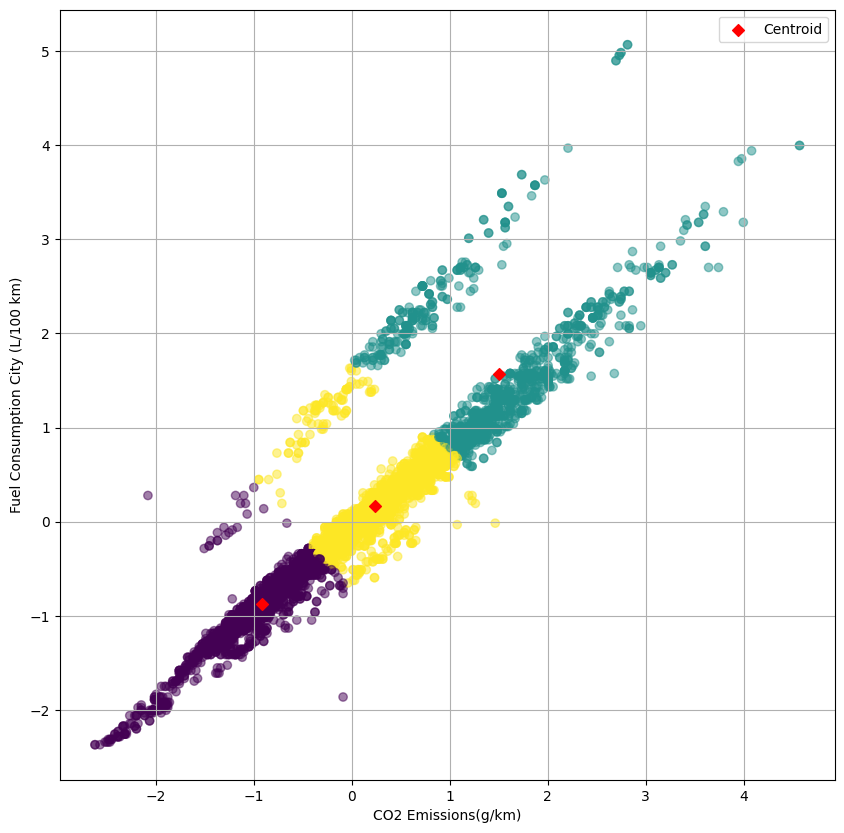

In [69]:
plt.figure(figsize = (10, 10))
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, c = "red", marker= "D", label = "Centroid")
plt.xlabel("CO2 Emissions(g/km)")
plt.ylabel("Fuel Consumption City (L/100 km)")
plt.grid(True)
plt.legend()
plt.show()

# Evaluasi K-Means dengan Cross Tab

In [72]:
df_means = pd.DataFrame({'labels' : labels, 'Fuel Type' : data_clean['Fuel Type']})

In [73]:
ct1 = pd.crosstab(df_means['labels'], df_means['Fuel Type'])

In [75]:
ct1

Fuel Type,D,E,N,X,Z
labels,,,,,
0,79,20,0,1574,890
1,0,222,0,308,625
2,68,88,1,1157,1256
